## Initializing library and data

In [1]:
library(glmnet)
library(MASS)
library(ISLR)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



In [2]:
data("Hitters") # Load dataset Hitters

In [3]:
Hitters1=data.frame(Hitters)

In [4]:
head(Hitters1)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NA,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [5]:
str(Hitters1)

'data.frame':	322 obs. of  20 variables:
 $ AtBat    : int  293 315 479 496 321 594 185 298 323 401 ...
 $ Hits     : int  66 81 130 141 87 169 37 73 81 92 ...
 $ HmRun    : int  1 7 18 20 10 4 1 0 6 17 ...
 $ Runs     : int  30 24 66 65 39 74 23 24 26 49 ...
 $ RBI      : int  29 38 72 78 42 51 8 24 32 66 ...
 $ Walks    : int  14 39 76 37 30 35 21 7 8 65 ...
 $ Years    : int  1 14 3 11 2 11 2 3 2 13 ...
 $ CAtBat   : int  293 3449 1624 5628 396 4408 214 509 341 5206 ...
 $ CHits    : int  66 835 457 1575 101 1133 42 108 86 1332 ...
 $ CHmRun   : int  1 69 63 225 12 19 1 0 6 253 ...
 $ CRuns    : int  30 321 224 828 48 501 30 41 32 784 ...
 $ CRBI     : int  29 414 266 838 46 336 9 37 34 890 ...
 $ CWalks   : int  14 375 263 354 33 194 24 12 8 866 ...
 $ League   : Factor w/ 2 levels "A","N": 1 2 1 2 2 1 2 1 2 1 ...
 $ Division : Factor w/ 2 levels "E","W": 1 2 2 1 1 2 1 2 2 1 ...
 $ PutOuts  : int  446 632 880 200 805 282 76 121 143 0 ...
 $ Assists  : int  33 43 82 11 40 421 127 28

In [6]:
Hitters1=na.omit(Hitters1)

## Data Preparation

In [7]:
# Create a model matrix by expanding factors and interactions
x=model.matrix(Salary~.,Hitters1) # prepares data matrix which is prepared for processing
head(x) # LeagueN Division NewLeague - are changed to 1 & 0 which were factor
dim(x)

,(Intercept),AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,LeagueN,DivisionW,PutOuts,Assists,Errors,NewLeagueN
-Alan Ashby,1,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,1
-Alvin Davis,1,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,0
-Andre Dawson,1,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,1
-Andres Galarraga,1,321,87,10,39,42,30,2,396,101,12,48,46,33,1,0,805,40,4,1
-Alfredo Griffin,1,594,169,4,74,51,35,11,4408,1133,19,501,336,194,0,1,282,421,25,0
-Al Newman,1,185,37,1,23,8,21,2,214,42,1,30,9,24,1,0,76,127,7,0


[1] 263  20

In [8]:
x=x[,-1] # Remove intercept column, do not run this cell more than once
head(x)
dim(x)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,LeagueN,DivisionW,PutOuts,Assists,Errors,NewLeagueN
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,1
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,0
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,1
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,1,0,805,40,4,1
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,0,1,282,421,25,0
-Al Newman,185,37,1,23,8,21,2,214,42,1,30,9,24,1,0,76,127,7,0


[1] 263  19

In [9]:
y=(Hitters1$Salary) # A vetor of salary
head(y)

[1] 475.0 480.0 500.0  91.5 750.0  70.0

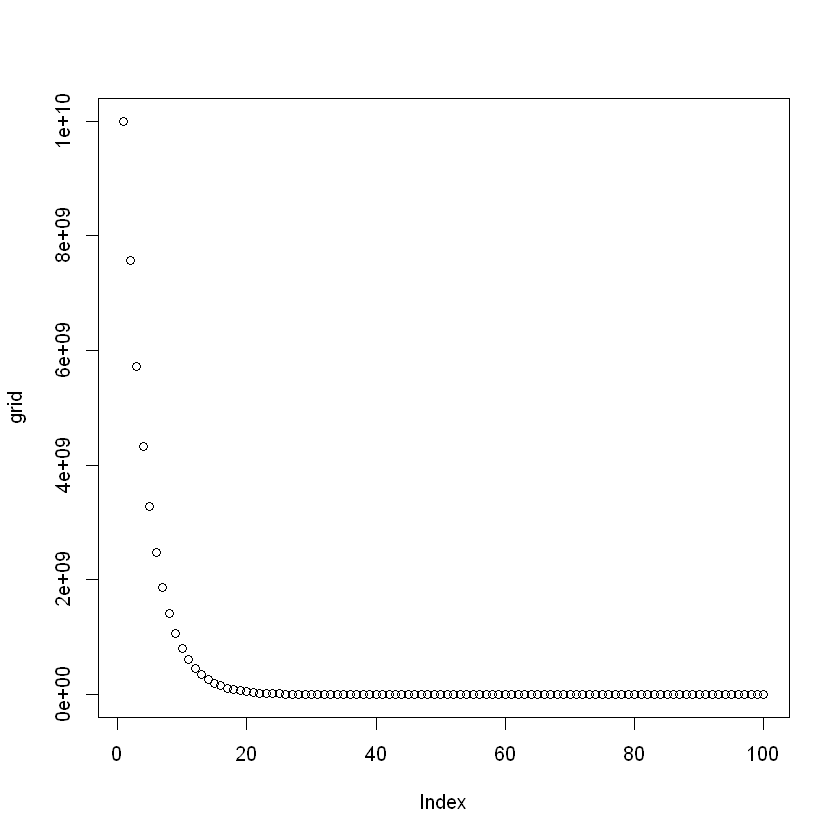

In [10]:
# grid of lambda
# create grid of lambda values
# for each lambda
    #prepare model for each lambda

grid=10^seq(10,-2,length=100) #Create a grid of 100 tuning parameters from, eqaully spaced 100 values between 10 & -2
# in high values changes are less hence power of 10 taken
plot(grid)

## Ridge Regression

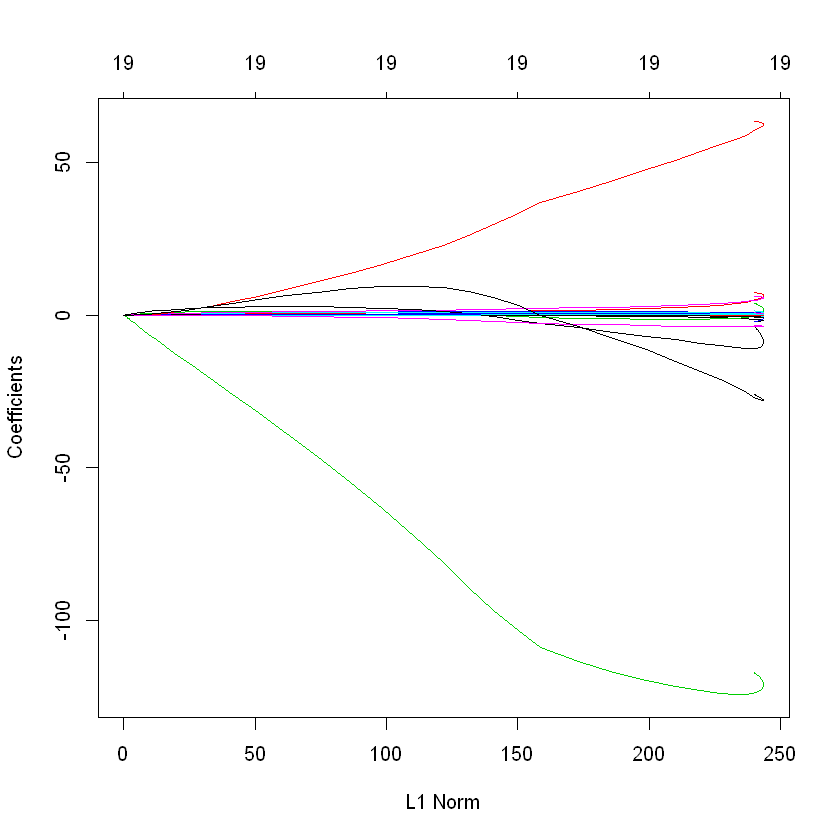

In [11]:
ridge.mod=glmnet(x,y,alpha = 0,lambda = grid)
plot(ridge.mod)

In [12]:
dim(coef(ridge.mod)) #100 sets of coefficients for each lambda

[1]  20 100

In [13]:
ridge.mod$lambda[1] #value of 1st lambda
ridge.mod$lambda[50] #value of 50th lambda
ridge.mod$lambda[100] #value of 100th lambda

[1] 1e+10

[1] 11497.57

[1] 0.01

In [14]:
# coefficient at 50th lambda i.e. values of beta's in 50th column
coef(ridge.mod)[,50]

(Intercept)         AtBat          Hits         HmRun          Runs 
407.356050200   0.036957182   0.138180344   0.524629976   0.230701523 
          RBI         Walks         Years        CAtBat         CHits 
  0.239841459   0.289618741   1.107702929   0.003131815   0.011653637 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
  0.087545670   0.023379882   0.024138320   0.025015421   0.085028114 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
 -6.215440973   0.016482577   0.002612988  -0.020502690   0.301433531

In [15]:
rbind(ridge.mod$lambda[c(1,30,40,50,60,70,80,90,100)], coef(ridge.mod)[2:10, c(1,30,40,50,60,70,80,90,100)])

10 x 9 sparse Matrix of class "dgCMatrix"
                 s0          s29          s39          s49          s59
       1.000000e+10 3.053856e+06 1.873817e+05 1.149757e+04 705.48023107
AtBat  5.443467e-08 1.781013e-04 2.856183e-03 3.695718e-02   0.11211115
Hits   1.974589e-07 6.460892e-04 1.038009e-02 1.381803e-01   0.65622409
HmRun  7.956523e-07 2.602891e-03 4.166863e-02 5.246300e-01   1.17980910
Runs   3.339178e-07 1.092488e-03 1.753936e-02 2.307015e-01   0.93769713
RBI    3.527222e-07 1.153932e-03 1.850770e-02 2.398415e-01   0.84718546
Walks  4.151323e-07 1.358217e-03 2.181794e-02 2.896187e-01   1.31987948
Years  1.697711e-06 5.553840e-03 8.883504e-02 1.107703e+00   2.59640425
CAtBat 4.673743e-09 1.528998e-05 2.449690e-04 3.131815e-03   0.01083413
CHits  1.720071e-08 5.627140e-05 9.021725e-04 1.165364e-02   0.04674557
               s69        s79        s89        s99
       43.28761281  2.6560878  0.1629751  0.0100000
AtBat  -0.41480601 -1.7526436 -1.9680069 -1.9738615
Hits    2.

In [16]:
# getting beta value at certain lambda
# predict beta values of inbetween lambda value with basic co ordinate geometry
ridge.pred<-predict(ridge.mod, s=50, type = "coefficients")
ridge.pred

20 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept)  4.876610e+01
AtBat       -3.580999e-01
Hits         1.969359e+00
HmRun       -1.278248e+00
Runs         1.145892e+00
RBI          8.038292e-01
Walks        2.716186e+00
Years       -6.218319e+00
CAtBat       5.447837e-03
CHits        1.064895e-01
CHmRun       6.244860e-01
CRuns        2.214985e-01
CRBI         2.186914e-01
CWalks      -1.500245e-01
LeagueN      4.592589e+01
DivisionW   -1.182011e+02
PutOuts      2.502322e-01
Assists      1.215665e-01
Errors      -3.278600e+00
NewLeagueN  -9.496680e+00

## Dividing Data into Training and Testing

Training - x[train], y[train]

Prediction - y^

error - x[test]

y.text=y[test]

In [17]:
# Simple demonstration with numbers
set.seed(1)

temp<-sample(1:10)
temp

train <- sample(1:10, 4)
#train
temp[train]

test = -train
#test
temp[test]



[1]  3  4  5  7  2  8  9  6 10  1

[1] 5 4 8 1

[1]  3  7  2  9  6 10

In [18]:
#if we set seed it generates sequence. next seq is genereated frm previous set n so on
set.seed(1)
#sample: it divides data into test and train data

#train
train<-sample(1:nrow(x), nrow(x)/2)
test<- -train

# x[train,]
# y[train] # vector
# x[test,]
# y[test]

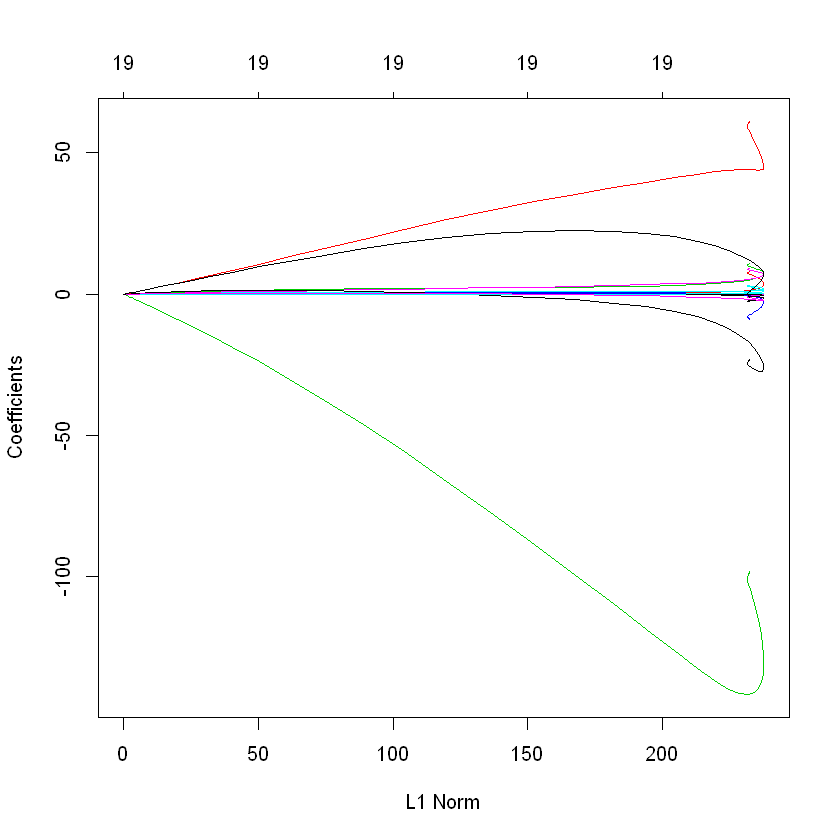

In [19]:
#new model on trainig data
ridge.mod2<- glmnet(x[train,],y[train], alpha = 0, lambda= grid)
plot(ridge.mod2)

In [20]:
#predict: gives y hat - s=4
ridge.pred<- predict(ridge.mod2, s=4,newx = x[test,])
#error
RSS<- mean((ridge.pred-y[test])^2)
RSS

#s=1e10 i.e. 10^10
ridge.pred<- predict(ridge.mod2, s=1e10,newx = x[test,])
#error
RSS1<-mean((ridge.pred-y[test])^2)
RSS1

#s=0
ridge.pred<- predict(ridge.mod2, s=0,newx = x[test,])
#error
RSS3<-mean((ridge.pred-y[test])^2)
RSS3

[1] 101186.3

[1] 193253.1

[1] 115816.1

## Using cross validation to find best model - Ridge

[1] 231.013

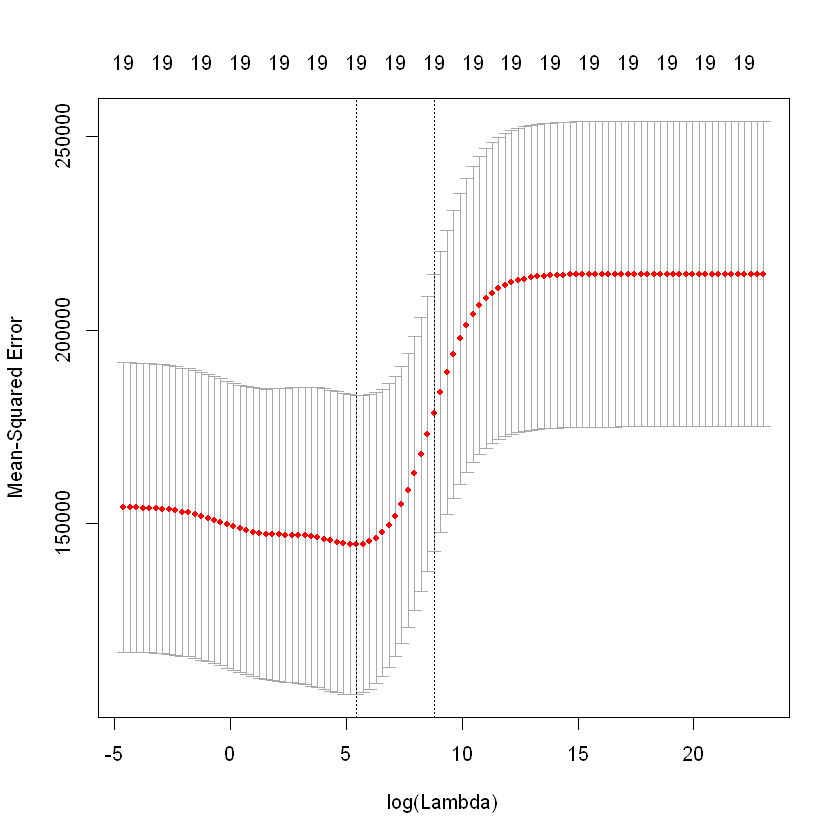

In [21]:
# Finding best lambda using Cross Validation
set.seed(1)
#for cross validation here if we dont give lambda value r will take itself value
cv.out.ridge <-cv.glmnet(x[train,],y[train], alpha= 0, lambda = grid)
plot(cv.out.ridge)

bestlambda <- cv.out.ridge$lambda.min
bestlambda

In [22]:
# predict best model using best lambda
ridge.pred<- predict(ridge.mod2, s= bestlambda, newx = x[test,])
RSS4<-mean((ridge.pred-y[test])^2)
RSS4
#error is less so best model for best lambda value

[1] 96010.43

## Lasso regression

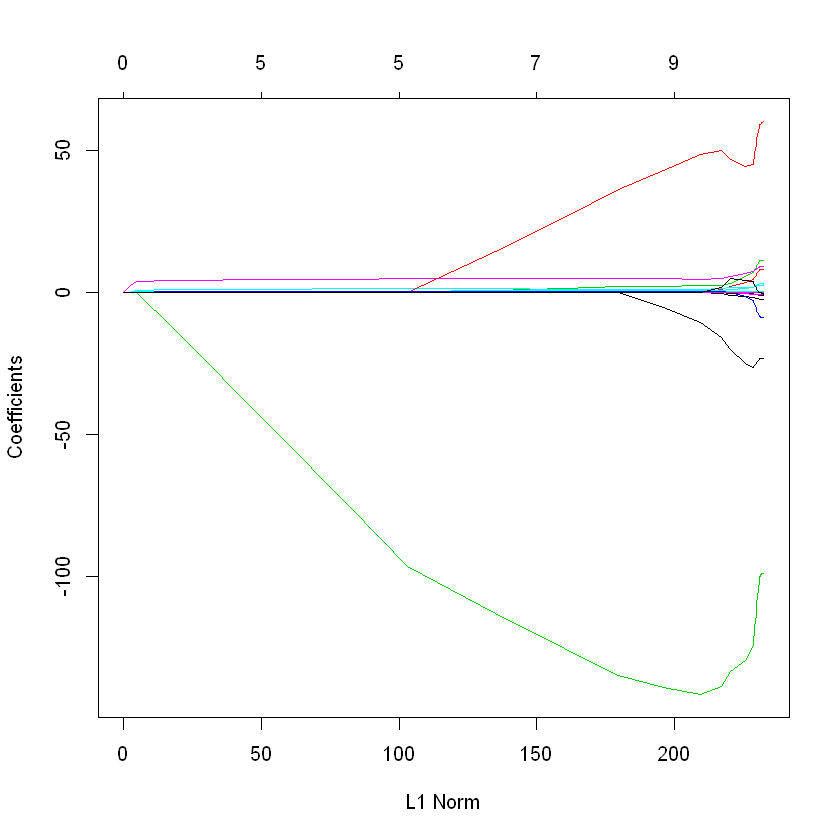

In [23]:
#new model on trainig data
lasso.mod <- glmnet(x[train,],y[train], alpha = 1, lambda= grid)
plot(lasso.mod)

In [29]:
#predict: gives y hat - s=4
lasso.pred<- predict(lasso.mod, s=4,newx = x[test,])
#error
RSS<- mean((lasso.pred-y[test])^2)
RSS

#s=1e10 i.e. 10^10
lasso.pred<- predict(lasso.mod, s=1e10,newx = x[test,])
#error
RSS1<-mean((lasso.pred-y[test])^2)
RSS1

#s=0
lasso.pred<- predict(lasso.mod, s=10,newx = x[test,])
#error
RSS3<-mean((lasso.pred-y[test])^2)
RSS3

[1] 95001.38

[1] 193253.1

[1] 100183.6

## Using cross validation to find best model - Lasso

[1] 18.73817

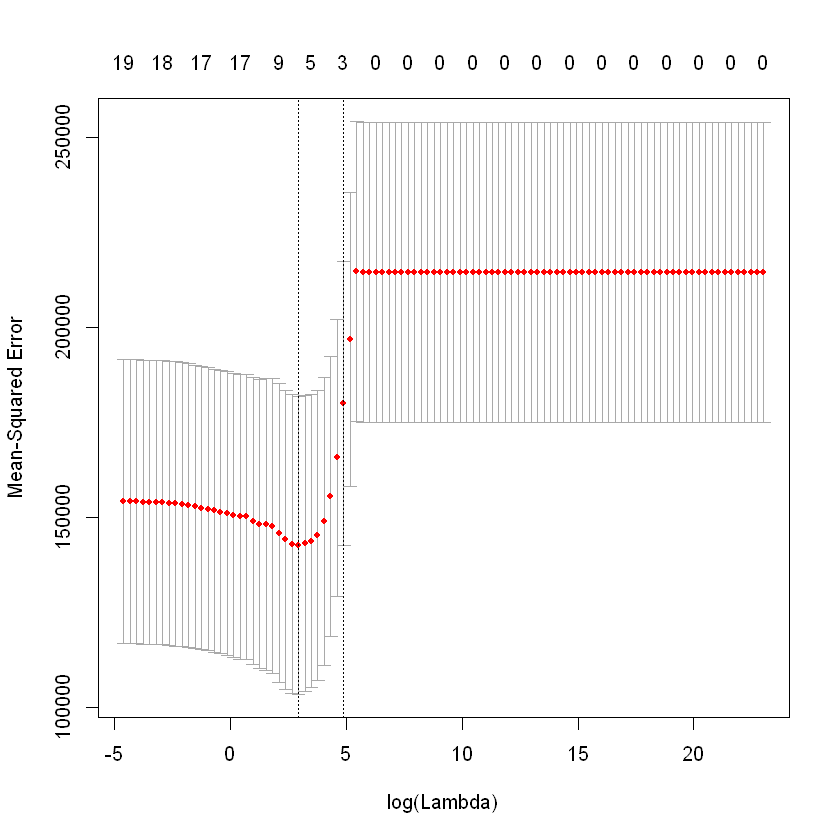

In [25]:
# Finding best lambda using Cross Validation
set.seed(1)
cv.out.lasso<- cv.glmnet(x[train,],y[train], alpha= 1, lambda = grid)
plot(cv.out.lasso)

bestlambda<- cv.out.lasso$lambda.min
bestlambda

In [26]:
# predict best model using best lambda
cv.out.lasso<-cv.glmnet(x[train,],y[train], alpha= 1, lambda = grid)
lasso.pred<-predict(cv.out.lasso , s=bestlambda, newx=x[test,])
RSS4<- mean((lasso.pred-y[test])^2)
RSS4
#error is less so best model for best lambda value

[1] 100862.5

## Looking for features which are having non-zero coefficent

In [27]:
lasso.out<-glmnet(x,y, alpha=1,lambda= grid)
lasso.coeff<- predict(lasso.out, type="coefficient", s= bestlambda)[1:20,]
#some values is equal to 0 in lasso
table(lasso.coeff!=0)
lasso.coeff[lasso.coeff!=0]


FALSE  TRUE 
   13     7 

(Intercept)        Hits       Walks       CRuns        CRBI   DivisionW 
 24.6392478   1.8499430   2.1961005   0.2058504   0.4095924 -99.9736534 
    PutOuts 
  0.2158902

In [28]:
# Lasso bestlambda is not giving the lowest value of error

# bestlambda = 100862.516721746
# s=4        = 95001.37877815
# s=10^10    = 193253.113067991
# s=10       = 100183.567316902